# Laboratorio # 1

Nancy Patricia Girón Muñoz

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Problema # 1

Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la función debe devolver una imagen la cual tenga activos los canales de color según los siguientes puntos:

    - Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
    - Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
    - Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
    - Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y verde.
    - Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y azul.
    - Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y rojo.
    

Leyendo imagen.

In [11]:
img = cv2.imread("Maserati.jpeg")

In [12]:
img.shape

(142, 355, 3)

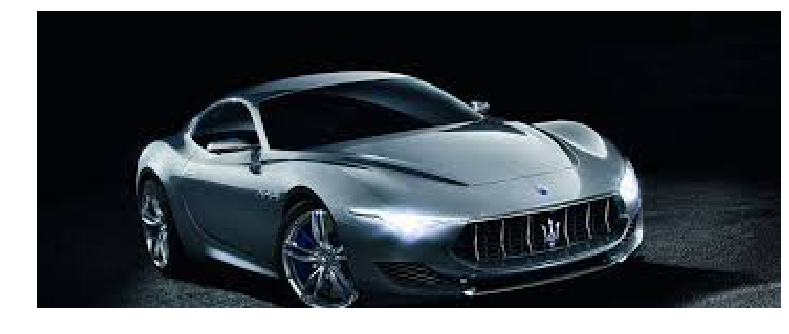

In [13]:
plt.figure(figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [46]:
def ColoresP1(img, color):
    V_color = img.copy()
    if (color == 1):
        V_color[:,:,[0,1]] = 0
    elif (color == 2): 
        V_color[:,:,[0,2]] = 0
    elif (color == 3): 
        #Rojo
        V_color[:,:,[1,2]] = 0
    elif (color == 10): 
        #rojo y verde
        V_color[:,:,2] = 0
    elif (color == 20): 
        #verde y azul
        V_color[:,:,0] = 0
    elif (color == 30): 
        #Azul y rojo
        V_color[:, :, 1] = 0
        
    return V_color


### Imagen Azul

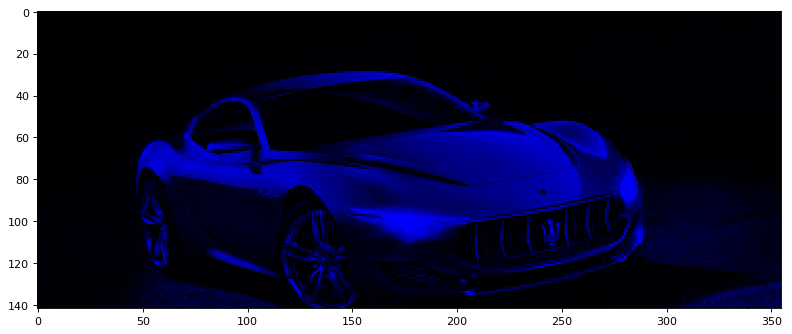

In [47]:
plt.figure(figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(ColoresP1(img, 1))

### Imagen verde

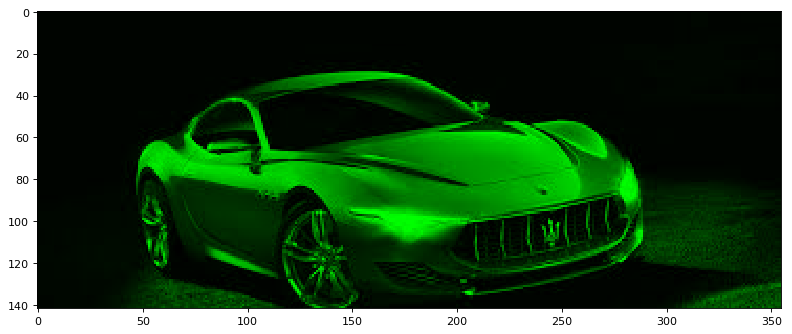

In [48]:
plt.figure(figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(ColoresP1(img, 2))

### Imagen roja

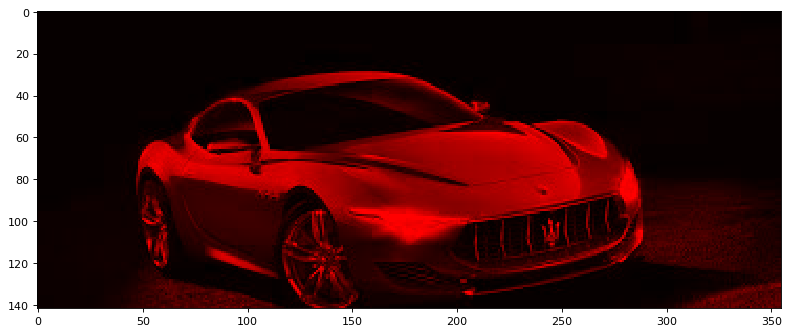

In [49]:
plt.figure(figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(ColoresP1(img, 3))

### Imagen roja y verde

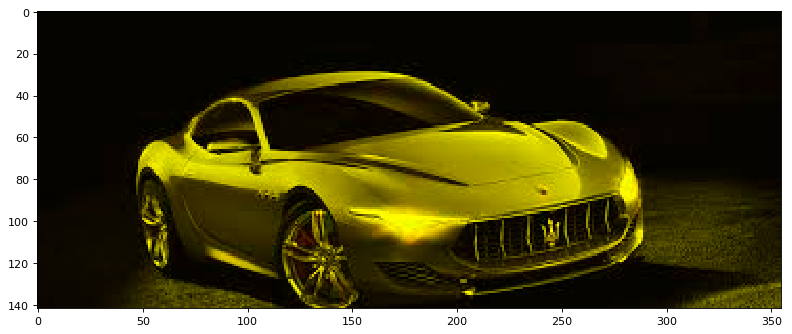

In [50]:
plt.figure(figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(ColoresP1(img, 10))

### Imagen verde y azul

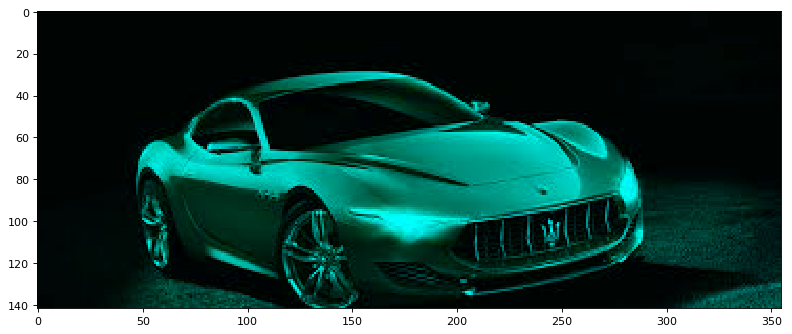

In [51]:
plt.figure(figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(ColoresP1(img, 20))

### Imagen azul y rojo

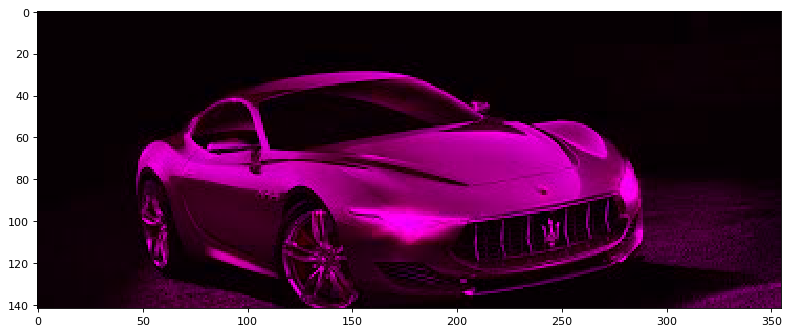

In [52]:
plt.figure(figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(ColoresP1(img, 30))

## Problema # 2

En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises, estas imágenes fueron creadas utilizando una escala de grises en 3D, cree una funci ́on que dadas las 3 imágenes se construya la imagen original a color.

Leyendo imagenes

In [104]:
A_img = cv2.imread("Imagen1/perro_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)
V_img = cv2.imread("Imagen1/perro_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
R_img = cv2.imread("Imagen1/perro_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)

Realizando funcion que una las tres imagenes y que se obtengan todos los colores. 

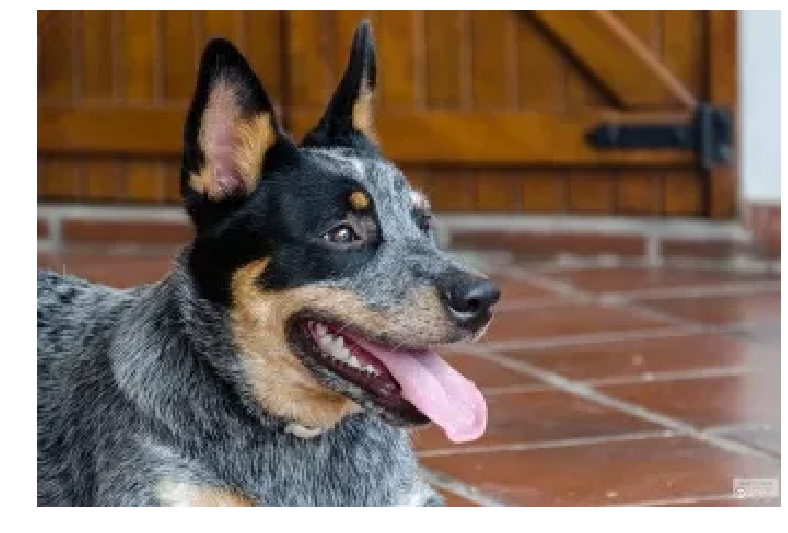

In [105]:
def unionColor(A_img, V_img, R_img):
    img_union = np.stack((A_img, V_img, R_img), axis=2)
    return img_union

imagenAcolor = unionColor(A_img, V_img, R_img)
plt.figure(figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')
plt.axis('off')
plt.imshow(cv2.cvtColor(imagenAcolor, cv2.COLOR_BGR2RGB))

### Problema # 3

Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

In [63]:
def Gray_separe(img):
    imgR = img[:,:,2]
    imgG = img[:,:,1]
    imgB = img[:,:,0]
    
    return imgR, imgG, imgB

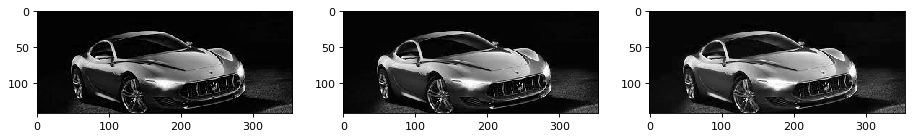

In [75]:
img = cv2.imread("Maserati.jpeg")

imgR, imgG, imgB = Gray_separe(img)

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k');
plt.subplot(1,3,1)
plt.imshow(imgR, cmap = 'gray', vmin = 0, vmax = 255)
plt.subplot(1,3,2)
plt.imshow(imgG, cmap = 'gray', vmin = 0, vmax = 255)
plt.subplot(1,3,3)
plt.imshow(imgB, cmap = 'gray', vmin = 0, vmax = 255)


In [76]:
cv2.imwrite("Imagen1/MaseratiR.jpg", imgR)
cv2.imwrite("Imagen1/MaseratiG.jpg", imgG)
cv2.imwrite("Imagen1/MaseratiB.jpg", imgB)

True

### Problema # 4

Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media de la distribución.

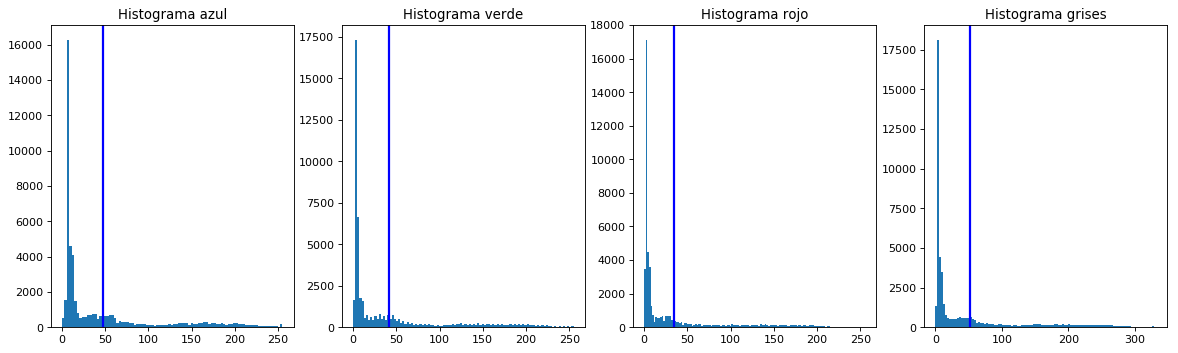

In [108]:
def histograma(img):
    # Obtenemos los canales de color
    imgR = img[:,:,2]
    imgG = img[:,:,1]
    imgB = img[:,:,0]
    gris = 0.2*img[:,:,0]+0.6*img[:,:,1]+0.5*img[:,:,2]
    plt.figure(figsize=(18, 5), dpi=80, facecolor='w', edgecolor='k');

    imagenes = [imgB, imgG, imgR, gris]
    color = ["azul", "verde", "rojo", "grises"]
    for i, image in enumerate(imagenes):
        plt.subplot(1,4,i+1)
        plt.title("Histograma " + color[i])
        plt.hist(image.ravel(), bins='auto')
        plt.axvline(x = np.mean(image.ravel()), linewidth=2, color='b', linestyle='-')

histograma(img)

### Problema # 5

Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una función que dada una imagen, realice una escala de grises ponderada (notar que no existe una solución única).

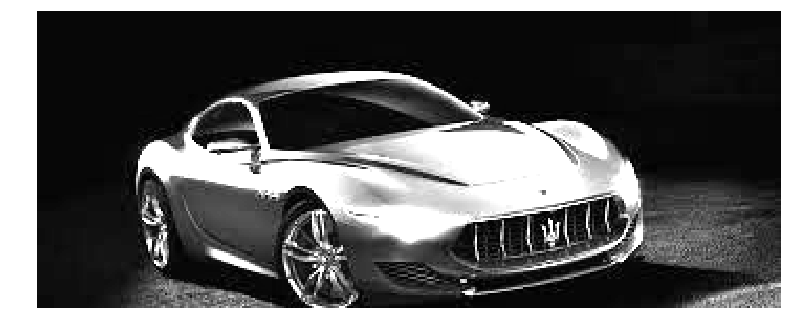

In [101]:
def Grises_ponderado(img):
    outimg = 0.70*img[:,:,2]+0.59*img[:,:,1]+0.50*img[:,:,0]
    return outimg

plt.figure(figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k');
plt.imshow(Grises_ponderado(img), cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off');

### Problema # 6

#### Modelo HSV

El modelo HSV (del inglés Hue, Saturation, Value – Matiz, Saturación, Valor), define un modelo de color en términos de sus componentes.

Es común que deseemos elegir un color adecuado para alguna de nuestras aplicaciones, cuando es así resulta muy útil usar la ruleta de color HSV. En ella el matiz se representa por una región circular; una región triangular separada, puede ser usada para representar la saturación y el valor del color. Normalmente, el eje horizontal del triángulo denota la saturación, mientras que el eje vertical corresponde al valor del color. De este modo, un color puede ser elegido al tomar primero el matiz de una región circular, y después seleccionar la saturación y el valor del color deseados de la región triangular.

#### Matiz

Se representa como un grado de ángulo cuyos valores posibles van de 0 a 360° (aunque para algunas aplicaciones se normalizan del 0 al 100%). Cada valor corresponde a un color. Ejemplos: 0 es rojo, 60 es amarillo y 120 es verde.

De forma intuitiva se puede realizar la siguiente transformación para conocer los valores básicos RGB:

Disponemos de 360 grados dónde se dividen los 3 colores RGB, eso da un total de 120º por color, sabiendo esto podemos recordar que el 0 es rojo RGB(1, 0, 0), 120 es verde RGB(0, 1, 0) y 240 es azul RGB(0, 0, 1). Para colores mixtos se utilizan los grados intermedios, el amarillo, RGB(1, 1, 0) está entre rojo y verde, por lo tanto 60º. Se puede observar como se sigue la secuencia de sumar 60 grados y añadir un 1 o quitar el anterior:


Cono del modelo HSV.
0º = RGB(1, 0, 0)
60º = RGB(1, 1, 0)
120º = RGB(0, 1, 0)
180º = RGB(0, 1, 1)
240º = RGB(0, 0, 1)
300º = RGB(1, 0, 1)
360º = 0º

#### Saturación

Se representa como la distancia al eje de brillo negro-blanco. Los valores posibles van del 0 al 100%. A este parámetro también se le suele llamar "pureza" por la analogía con la pureza de excitación y la pureza colorimétrica de la colorimetría. Cuanto menor sea la saturación de un color, mayor tonalidad grisácea habrá y más decolorado estará. Por eso es útil definir la insaturación como la inversa cualitativa de la saturación.